In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.
Data Dictionary
•	Ticket #: Ticket number assigned to each complaint
•	Customer Complaint: Description of complaint
•	Date: Date of complaint
•	Time: Time of complaint
•	Received Via: Mode of communication of the complaint
•	City: Customer city
•	State: Customer state
•	Zipcode: Customer zip
•	Status: Status of complaint
•	Filing on behalf of someone

Analysis Task
To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.
- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.
•	Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
•	Which state has the maximum complaints
•	Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [33]:
comcast = pd.read_csv(r"C:\Users\Vaibhav\Desktop\BA\Datasets\Comcast_telecom_complaints_data.csv")

In [34]:
comcast.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes


In [35]:
comcast.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [36]:
comcast["Date"] = pd.to_datetime(comcast.Date, format = "%d-%m-%y")

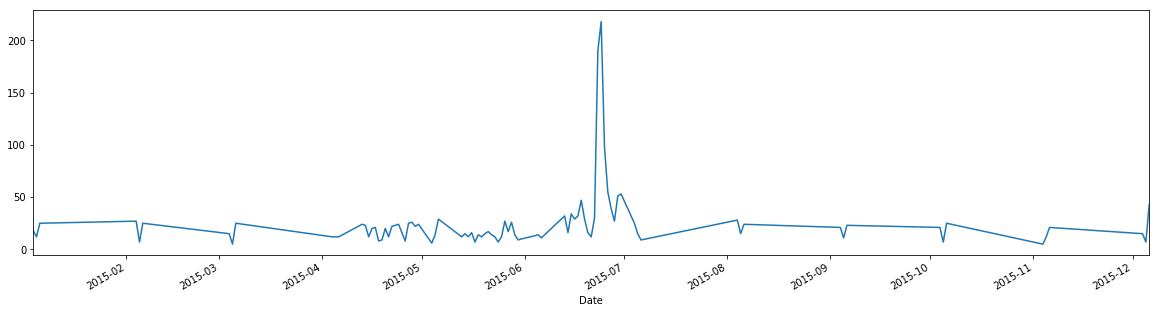

In [37]:
plt.figure(figsize = (20,5))
comcast.groupby("Date").count()["Ticket #"].plot(kind = "line")

In [38]:
#comcast.plot()

#### To get the granularity level of month

In [39]:
comcast["Month"] = comcast["Date"].apply(lambda x: x.month)

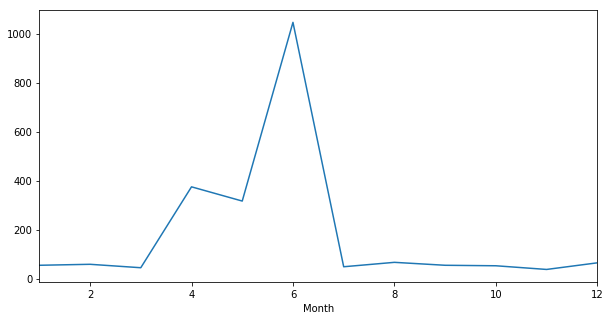

In [40]:
plt.figure(figsize = (10,5))
comcast.groupby("Month").count()["Ticket #"].plot(kind = "line")

#### Provide a table with the frequency of complaint types.

In [41]:
comcast["Customer Complaint"].value_counts() #complaint types: comcast service, internet, data, billing

Comcast                                                                                       83
Comcast Internet                                                                              18
Comcast Data Cap                                                                              17
comcast                                                                                       13
Comcast Billing                                                                               11
Data Caps                                                                                     11
Comcast Data Caps                                                                             11
Unfair Billing Practices                                                                       9
Data Cap                                                                                       8
Comcast data caps                                                                              8
Comcast internet              

#### Q. Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [42]:
comcast.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4
1,223441,Payment disappear - service got disconnected,2015-08-04,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4


In [43]:
import re
comcast["Complaint_Type_Internet"] = [re.search("([Ii]nternet)", comcast["Customer Complaint"][i])!=None for i in range(comcast.shape[0])]

In [44]:
comcast["Complaint_Type_Data"] = [re.search("([Dd]ata)", comcast["Customer Complaint"][i])!=None for i in range(comcast.shape[0])]

In [45]:
comcast["Complaint_Type_Billing"] = [re.search("[Bb]illing", comcast["Customer Complaint"][i])!=None for i in range(comcast.shape[0])]

In [46]:
re.search("([cC][oO][Mm][cC][Aa][Ss][Tt])$|([Ss]ervice)", comcast["Customer Complaint"][2])

<_sre.SRE_Match object; span=(10, 17), match='Service'>

In [47]:
comcast["Complaint_Type_Service"] = [re.search("([cC][oO][Mm][cC][Aa][Ss][Tt])$|([Ss]ervice)", comcast["Customer Complaint"][i])!=None for i in range(comcast.shape[0])]

In [48]:
comcast[["Complaint_Type_Internet", "Complaint_Type_Data", "Complaint_Type_Billing", "Complaint_Type_Service"]].sum()

Complaint_Type_Internet    523
Complaint_Type_Data        216
Complaint_Type_Billing     291
Complaint_Type_Service     660
dtype: int64

In [49]:
#Max complaints are of the type service

#### Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [50]:
pd.value_counts(comcast.Status, dropna=False)

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [51]:
comcast["Status"] = comcast["Status"].replace({"Pending":"Open",
                                               "Solved": "Closed"})
pd.value_counts(comcast.Status, dropna=False)

Closed    1707
Open       517
Name: Status, dtype: int64

Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

•	Which state has the maximum complaints

•	Which state has the highest percentage of unresolved complaints

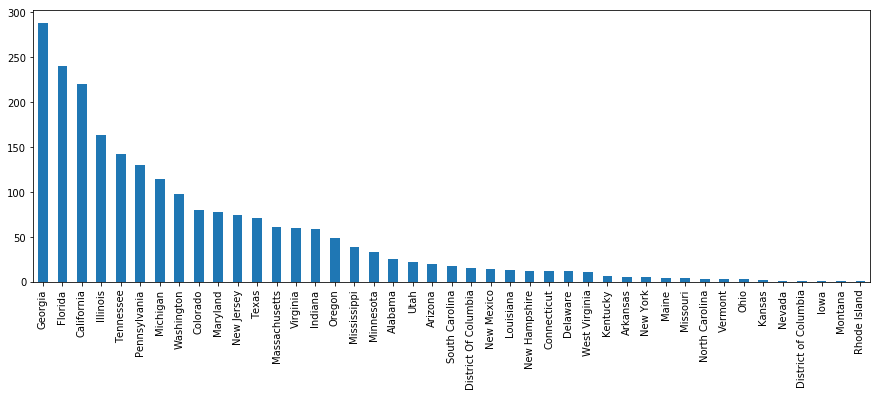

In [30]:
plt.figure(figsize=(15,5))
pd.value_counts(comcast.State).plot(kind = "bar")

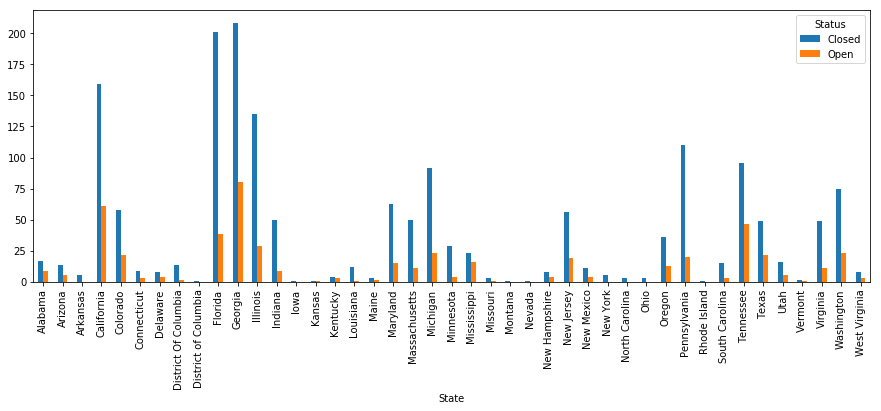

In [86]:
pd.crosstab(comcast.State, comcast.Status).plot(kind = "bar", figsize = (15,5) )
plt.show()

#### - Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [109]:
comcast[comcast["Received Via"].isin(["Internet", "Customer Care"])].head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Internet,Data,Complaint_Type_Internet,Complaint_Type_Data,Complaint_Type_Billing,Complaint_Type_Service
1,223441,Payment disappear - service got disconnected,2015-08-04,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,False,False,False,False,False,True
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,False,False,False,False,False,True
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,False,False,False,False,False,False
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Closed,No,5,False,False,False,False,False,True
5,338519,ISP Charging for arbitrary data limits with ov...,2015-12-06,06-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Closed,No,12,False,True,False,True,False,False


In [112]:
comcast[comcast["Received Via"].isin(["Internet", "Customer Care"])].groupby("Status").count()["Ticket #"]/sum(comcast[comcast["Received Via"].isin(["Internet", "Customer Care"])].groupby("Status").count()["Ticket #"])

Status
Closed    0.762896
Open      0.237104
Name: Ticket #, dtype: float64